In [2]:
import numpy as np
import pandas as pd

In [109]:
df = pd.read_excel(r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx" ,sheet_name ='Demography')



dictionary = list(zip(df['inpatient_number'], df['gender'][:10]))

print(dictionary)





[(857781, 'Male'), (743087, 'Female'), (866418, 'Male'), (775928, 'Male'), (810128, 'Female'), (823318, 'Female'), (844094, 'Male'), (787530, 'Female'), (795420, 'Female'), (829801, 'Female')]


23	How many patients were prescribed Digoxin?


In [18]:
import pandas as pd

df = pd.read_excel(r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx" ,sheet_name ='Patient_Precriptions')

newdata = (df['Drug_name']=='Digoxin tablet')
df.loc[newdata]


,inpatient_number,Drug_name
12,857781,Digoxin tablet
35,810128,Digoxin tablet
36,823318,Digoxin tablet
53,844094,Digoxin tablet
64,787530,Digoxin tablet
...,...,...
15333,740689,Digoxin tablet
15338,734280,Digoxin tablet
15347,781004,Digoxin tablet
15358,791864,Digoxin tablet


22	Which patient was on the most number of prescribed drugs? What was his age and outcome?

In [154]:
import pandas as pd

# Read data from excel sheets
patient_prescription = pd.read_excel(r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx", sheet_name="Patient_Precriptions")
demography = pd.read_excel(r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx", sheet_name="Demography")
hospitalization_discharge = pd.read_excel(r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx", sheet_name="Hospitalization_Discharge")


patient_drugs = patient_prescription.merge(demography, on="inpatient_number", how="left")
patient_drugs = patient_drugs.merge(hospitalization_discharge, on="inpatient_number", how="left")
patient_details = most_drugs_patient.merge(demography, on="inpatient_number", how="left")
patient_details = patient_details.merge(hospitalization_discharge, on="inpatient_number", how="left")


patient_drug_count = patient_drugs.groupby("inpatient_number")["Drug_name"].count().reset_index()
patient_drug_count.columns = ["inpatient_number", "drug_count"]
most_drugs_patient = patient_drug_count.loc[patient_drug_count["drug_count"] == patient_drug_count["drug_count"].max()]
print(most_drugs_patient)

Most_Drug_Patient = {patient_details.iloc[0]['inpatient_number']}
Age = {patient_details.iloc[0]['ageCat']}
Outcome = {patient_details.iloc[0]['outcome_during_hospitalization']}

print("Patient with most drugs:",Most_Drug_Patient )
print("Age category:",Age)
print("Outcome:",Outcome )

     inpatient_number  drug_count
659            777204          16
Patient with most drugs: {777204}
Age category: {'79-89'}
Outcome: {'Alive'}


<Axes: >

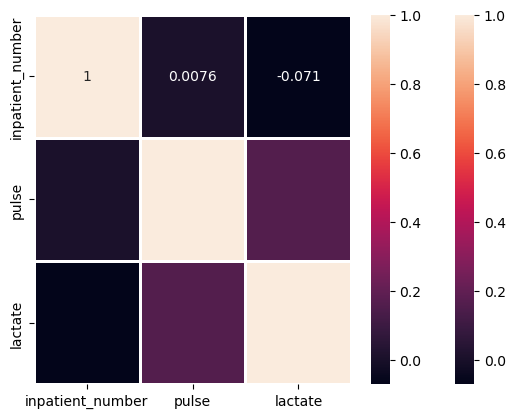

In [102]:
import seaborn as sb
import matplotlib.pyplot as plt
path= r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx"
import pandas as pd
df = pd.read_excel(path,sheet_name = 'Labs',usecols=['inpatient_number','pulse','lactate'])

sb.heatmap(df.corr())
sb.heatmap(df.corr(),annot=True,linewidths=1)


25.Using GCS score, how many patients are considered to be in a coma?

In [167]:
path= r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx"

import pandas as pd
df = pd.read_excel(path,sheet_name = 'Responsivenes',usecols=['inpatient_number','GCS'])
#df1 = pd.read_excel(path,sheet_name = 'Responsivenes',usecols=['diabetes'])


GCS_Score = df[df.GCS <=8]

print(GCS_Score.count())



inpatient_number    19
GCS                 19
dtype: int64


29. What percentage of those in a coma also have diabetes?

In [78]:
path= r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx"

import pandas as pd
df = pd.read_excel(path,sheet_name = 'Responsivenes',usecols=['inpatient_number','GCS'])
df1 = pd.read_excel(path,sheet_name = 'PatientHistory',usecols=['inpatient_number','diabetes'])

GCS_Score = df[df.GCS <=8]

data = df1[df1.diabetes == 1]

dfrm = pd.concat([GCS_Score, data,], axis=1)

print(dfrm)



      inpatient_number  GCS  inpatient_number  diabetes
379           731871.0  3.0               NaN       NaN
419           750322.0  6.0               NaN       NaN
424           838076.0  7.0               NaN       NaN
487           731880.0  7.0               NaN       NaN
626           781960.0  3.0               NaN       NaN
...                ...  ...               ...       ...
1989               NaN  NaN          807293.0       1.0
1990               NaN  NaN          805610.0       1.0
1996               NaN  NaN          732742.0       1.0
1999               NaN  NaN          804209.0       1.0
2005               NaN  NaN          781004.0       1.0

[483 rows x 4 columns]


17	Using arrays and loops find the number of patients who were Admitted in the month of November


In [37]:


import pandas as pd
import numpy as np

# Read data from excel sheet (assuming 'hospital_data' sheet)
df = pd.read_excel(r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx" ,sheet_name ='Hospitalization_Discharge')

 
df['month'] = df['Admission_date'].dt.month

november_patients = df[df['month'] == 11]
number_of_patients = november_patients.shape[0]

print("Number of patients admitted in November:", number_of_patients)


Number of patients admitted in November: 195


32	Combine admission_ward & admission_way and count the patients under the new group. Create a pie chart and explode the biggest wedge

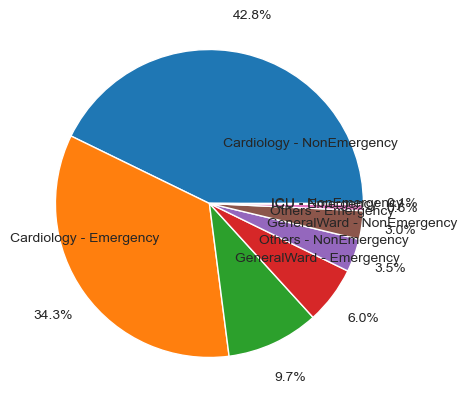

In [86]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel(r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx" ,sheet_name ='Hospitalization_Discharge',usecols=['admission_ward','admission_way'])


admission_ward = df['admission_ward']
admission_way= df['admission_way']


df['combined'] = df['admission_ward'] + ' - ' + df['admission_way']

group_counts = df['combined'].value_counts().reset_index(name='count')

plt.figure(figsize=(8, 5))  
plt.pie(group_counts["count"],labels=group_counts["combined"],autopct="%1.1f%%",labeldistance=.4,pctdistance=1.25) 
plt.show()




18. Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method


      occupation        BMI
0        Officer  21.942649
1         Others  21.074454
2  UrbanResident  21.764504
3         farmer  22.481934
4         worker  21.172089


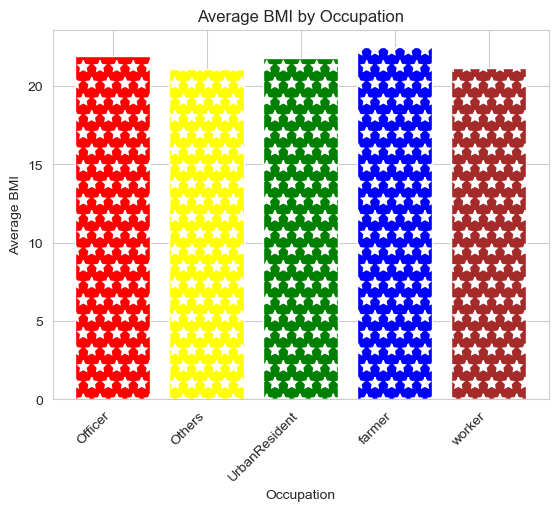

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel(r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx" ,sheet_name ='Demography',usecols=['BMI','occupation'])

df = pd.DataFrame(data)

avg_occupation = df.groupby('occupation')['BMI'].mean().reset_index()

print(avg_occupation)


fig,ax = plt.subplots()
bars = ax.bar(avg_occupation['occupation'], avg_occupation['BMI'],color=['red','yellow','green','blue','brown'], hatch = '*')

plt.xlabel("Occupation")
plt.ylabel("Average BMI")
plt.title("Average BMI by Occupation")
plt.xticks(rotation=45, ha="right")  
plt.show()


Create a column that randomly generates an age between the age group given for each patient. What was the average age of the patients?


In [121]:
import pandas as pd
import numpy as np


data =  pd.read_excel(r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx" ,sheet_name ='Demography',usecols = ['ageCat'])
df = pd.DataFrame(data)


def generate_random_age(age_range): 
  lower, upper = map(int, age_range.split('-'))
  return np.random.randint(lower, upper + 1) 


df['age'] = df['ageCat'].apply(generate_random_age)
average_Age = df.age.mean()
Average_Age_number =np.round(average_Age).astype(int)


print(df)
print("Average age of a patients:",Average_Age_number)


     ageCat  age
0     69-79   71
1     69-79   74
2     59-69   67
3     69-79   71
4     69-79   74
...     ...  ...
2003  79-89   89
2004  79-89   87
2005  39-49   41
2006  49-59   52
2007  79-89   83

[2008 rows x 2 columns]
Average age of a patients: 75


27.Using the age column generated in Q.26, calculate year of birth for each patient


In [132]:
data =  pd.read_excel(r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx" ,sheet_name ='Demography',usecols = ['ageCat'])
df = pd.DataFrame(data)


def generate_random_age(age_range): 
  lower, upper = map(int, age_range.split('-'))
  return np.random.randint(lower, upper + 1) 


df['age'] = df['ageCat'].apply(generate_random_age)
print(df)


current_year = pd.Timestamp.now().year
df['year_of_birth'] = current_year - df['age']



#dfrm = pd.DataFrame(df['age'],df['year_of_birth'])


print(df['year_of_birth'])

     ageCat  age
0     69-79   74
1     69-79   73
2     59-69   68
3     69-79   73
4     69-79   78
...     ...  ...
2003  79-89   82
2004  79-89   86
2005  39-49   44
2006  49-59   52
2007  79-89   83

[2008 rows x 2 columns]
0       1950
1       1951
2       1956
3       1951
4       1946
        ... 
2003    1942
2004    1938
2005    1980
2006    1972
2007    1941
Name: year_of_birth, Length: 2008, dtype: int64


31	Group the days to re-admission into bins and count how many patients were in each bin

In [147]:
import pandas as pd
import numpy as np


data =  pd.read_excel(r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx" ,sheet_name ='Hospitalization_Discharge')
df = pd.DataFrame(data)

bins = [0, 30, 60, 90, 120, 150]
labels = ['0-30 days', '31-60 days', '61-90 days', '91-120 days', '150+ days']

data['days_bin'] = pd.cut(df['readmission_time_days_from_admission'], bins=bins, labels=labels)

print(data['days_bin'])
patient_counts = df.groupby(data['days_bin'],observed = True)['inpatient_number'].count()

print(patient_counts)







0              NaN
1              NaN
2              NaN
3        0-30 days
4              NaN
           ...    
2003           NaN
2004           NaN
2005    61-90 days
2006           NaN
2007           NaN
Name: days_bin, Length: 2008, dtype: category
Categories (5, object): ['0-30 days' < '31-60 days' < '61-90 days' < '91-120 days' < '150+ days']
days_bin
0-30 days      156
31-60 days     174
61-90 days     168
91-120 days     96
150+ days       65
Name: inpatient_number, dtype: int64


24	What columns indicate a prescence of anemia? Create a severity score for anemia and prove or disprove a correlation to Length of stay

We have three column related to hemoglobin, I am taking hemoglobin column for my findings.

Grade 0: Normal Hb level
Grade 1: Mild anemia, 100 g/l, normal level
Grade 2: Moderate anemia, 80-100 g/l
Grade 3: Severe anemia, 65-80 g/l
Grade 4: Life-threatening anemia, <65 g/l

Here, I am taking Grade 3: Severe anemia, 65-80 g/l to find out severity score for anemia.

Findings:There is a positive correlation between severity score for anemia and  Length of stay.

      hemoglobin
11          67.0
15          72.0
26          76.0
31          79.0
50          72.0
...          ...
1882        69.0
1903        73.0
1929        78.0
1950        70.0
1991        73.0

[131 rows x 1 columns]


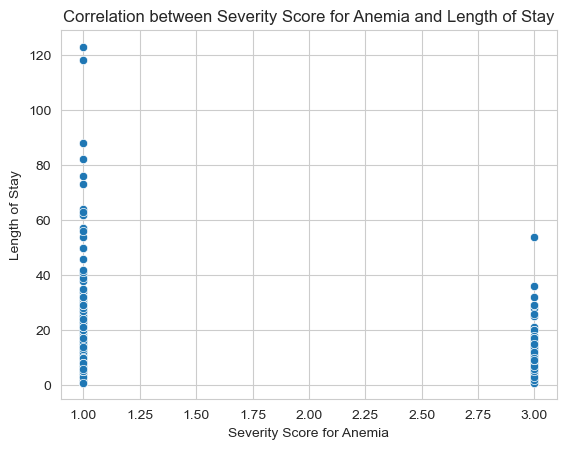

Pearson Correlation Coefficient: 0.030613891382157477


In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df =  pd.read_excel(r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx" ,sheet_name ='Labs',usecols =['hemoglobin','inpatient_number'])
df1 =  pd.read_excel(r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx" ,sheet_name ='Hospitalization_Discharge',usecols =['dischargeDay','inpatient_number'])

merged_df =pd.merge(df,df1,on = 'inpatient_number')

merged_df['Severity_Score'] = np.where((merged_df['hemoglobin'] >= 65) & (merged_df['hemoglobin'] <= 80), 3, 1)

severe_anemia_df = merged_df[merged_df['Severity_Score'] == 3]

print(Severe_Anemia)
sns.scatterplot(data=merged_df, x='Severity_Score', y='dischargeDay')
plt.title('Correlation between Severity Score for Anemia and Length of Stay')
plt.xlabel('Severity Score for Anemia')
plt.ylabel('Length of Stay')
plt.show()

correlation = merged_df['Severity_Score'].corr(merged_df['dischargeDay'])
print("Correlation Coefficient:", correlation)


30	Identify any columns relating to echocardiography and create a severity score for cardiac function. Compare this outcome and show average severity score for each outcome

We have several columns related to finding echocardiography, I am taking EA (E/A Ratio)

Normal Function: E/A ratio between 0.8 and 2.0
Mildly Abnormal: E/A ratio < 0.8 or > 2.0
Moderately Abnormal: E/A ratio < 0.6 or > 2.5
Severely Abnormal: E/A ratio < 0.5 or > 

here, I am taking E/A ratio < 0.5 or > 3.0 to calculate severity score.3.0


In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df =  pd.read_excel(r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx" ,sheet_name ='CardiacComplications',usecols =['EA','inpatient_number'])
df1 =  pd.read_excel(r"C:\Users\anith\Downloads\Cardiac_Outcomes.xlsx" ,sheet_name ='Hospitalization_Discharge',usecols =['outcome_during_hospitalization','inpatient_number'])

merged_df =pd.merge(df,df1,on = 'inpatient_number')

merged_df['Severity_Score'] = np.where((merged_df['EA'] < 0.5) | (merged_df['EA'] >3),3,1)

print(merged_df['Severity_Score'] )

avg_occupation = merged_df.groupby('outcome_during_hospitalization')['Severity_Score'].mean().reset_index() 

print(avg_occupation)


0       1
1       1
2       3
3       1
4       1
       ..
2003    1
2004    1
2005    1
2006    1
2007    1
Name: Severity_Score, Length: 2008, dtype: int32
  outcome_during_hospitalization  Severity_Score
0                          Alive        1.050794
1                           Dead        1.000000
2          DischargeAgainstOrder        1.018692
